In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

# Feature Prep

In [20]:
df = pd.read_parquet('../../data/bike_trips_cleaned.parquet')

In [21]:
df.columns

Index(['start_time', 'end_time', 'start_station_id', 'end_station_id',
       'bike_id', 'user_type', 'end_station_name', 'start_station_name',
       'duration', 'start_lat', 'start_lon', 'end_lat', 'end_lon', 'distance',
       'speed', 'average_time', 'date_time', 'max_temp', 'min_temp', 'precip'],
      dtype='object')

In [22]:
df['temp'] = (df['min_temp'] + df['max_temp']) / 2
df['hour']  = df['average_time'].dt.hour
df['duration'] = df['duration'] / pd.Timedelta(minutes=1)
df['is_weekday'] = df['date_time'].dt.dayofweek < 6

df['date_offset'] = (df.date_time.dt.month*100 + df.date_time.dt.day - 320)%1300

df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300],
                      labels=['spring', 'summer', 'autumn', 'winter'])

df['user_type'] = df['user_type'].astype('category')

In [23]:
#Times
df_night = df[df['hour'] < 6]
df_morning = df[(df['hour'] >= 6) & (df['hour'] < 12)]
df_noon = df[(df['hour'] >= 12) & (df['hour'] < 18)]
df_evening = df[(df['hour'] >= 18) & (df['hour'] < 24)]

#Seasons
df_spring = df[df['season'] == 'spring']
df_summer = df[df['season'] == 'summer']
df_autumn = df[df['season'] == 'autumn']
df_winter = df[df['season'] == 'winter']

df_weekday = df[df['is_weekday'] == 1]
df_weekend = df[df['is_weekday'] == 0]

df_stations = pd.DataFrame({'all': df.groupby('start_station_id').size(), 'end': df.groupby('end_station_id').size(), 'diff': np.abs(df.groupby('start_station_id').size() - df.groupby('end_station_id').size())})

df_stations['start_night_rides'] = df_night.groupby('start_station_id').size()
df_stations['start_morning_rides'] = df_morning.groupby('start_station_id').size()
df_stations['start_noon_rides'] = df_noon.groupby('start_station_id').size()
df_stations['start_evening_rides'] = df_evening.groupby('start_station_id').size()

df_stations['end_night_rides'] = df_night.groupby('end_station_id').size()
df_stations['end_morning_rides'] = df_morning.groupby('end_station_id').size()
df_stations['end_noon_rides'] = df_noon.groupby('end_station_id').size()
df_stations['end_evening_rides'] = df_evening.groupby('end_station_id').size()

df_stations['start_spring_rides'] = df_spring.groupby('start_station_id').size()
df_stations['start_summer_rides'] = df_summer.groupby('start_station_id').size()
df_stations['start_autumn_rides'] = df_autumn.groupby('start_station_id').size()
df_stations['start_winter_rides'] = df_winter.groupby('start_station_id').size()

df_stations['start_weekday_rides'] = df_weekday.groupby('start_station_id').size()
df_stations['start_weekend_rides'] = df_weekend.groupby('start_station_id').size()

df_stations['end_spring_rides'] = df_spring.groupby('end_station_id').size()
df_stations['end_summer_rides'] = df_summer.groupby('end_station_id').size()
df_stations['end_autumn_rides'] = df_autumn.groupby('end_station_id').size()
df_stations['end_winter_rides'] = df_winter.groupby('end_station_id').size()

df_stations['end_weekday_rides'] = df_weekday.groupby('end_station_id').size()
df_stations['end_weekend_rides'] = df_weekend.groupby('end_station_id').size()


In [24]:
df_stations = df_stations.fillna(0)

for col in df_stations:
    df_stations[col] = df_stations[col].astype('int')

In [25]:
df_stations

,all,end,diff,start_night_rides,start_morning_rides,start_noon_rides,start_evening_rides,end_night_rides,end_morning_rides,end_noon_rides,...,start_autumn_rides,start_winter_rides,start_weekday_rides,start_weekend_rides,end_spring_rides,end_summer_rides,end_autumn_rides,end_winter_rides,end_weekday_rides,end_weekend_rides
3004,9626,10453,827,327,1075,5038,3186,171,4969,3881,...,2198,1428,8825,801,3154,3152,2619,1518,9558,895
3005,4248,4801,553,368,684,1560,1636,222,1462,1753,...,1006,353,3637,611,1325,1912,1134,427,4176,625
3006,8281,7416,865,457,1837,3167,2820,290,1831,2938,...,2419,813,7233,1048,1732,2901,2097,682,6442,974
3007,12311,12909,598,431,4479,4008,3393,477,2926,5591,...,3131,1633,10819,1492,3707,4063,3165,1957,11388,1521
3008,2439,2315,124,56,461,1121,801,75,931,736,...,830,310,2261,178,538,577,855,343,2139,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,666,650,16,29,160,294,183,14,127,306,...,250,25,599,67,110,277,235,28,586,64
3123,1017,876,141,62,231,461,263,79,181,359,...,437,25,925,92,162,295,391,28,792,84
3124,3597,4003,406,232,894,1159,1312,114,840,1776,...,811,41,2815,782,1060,2008,900,35,3155,848
3125,7000,6806,194,483,2140,2221,2156,213,1463,2799,...,2243,87,6090,910,1482,3070,2162,92,5964,842


# Visualisation

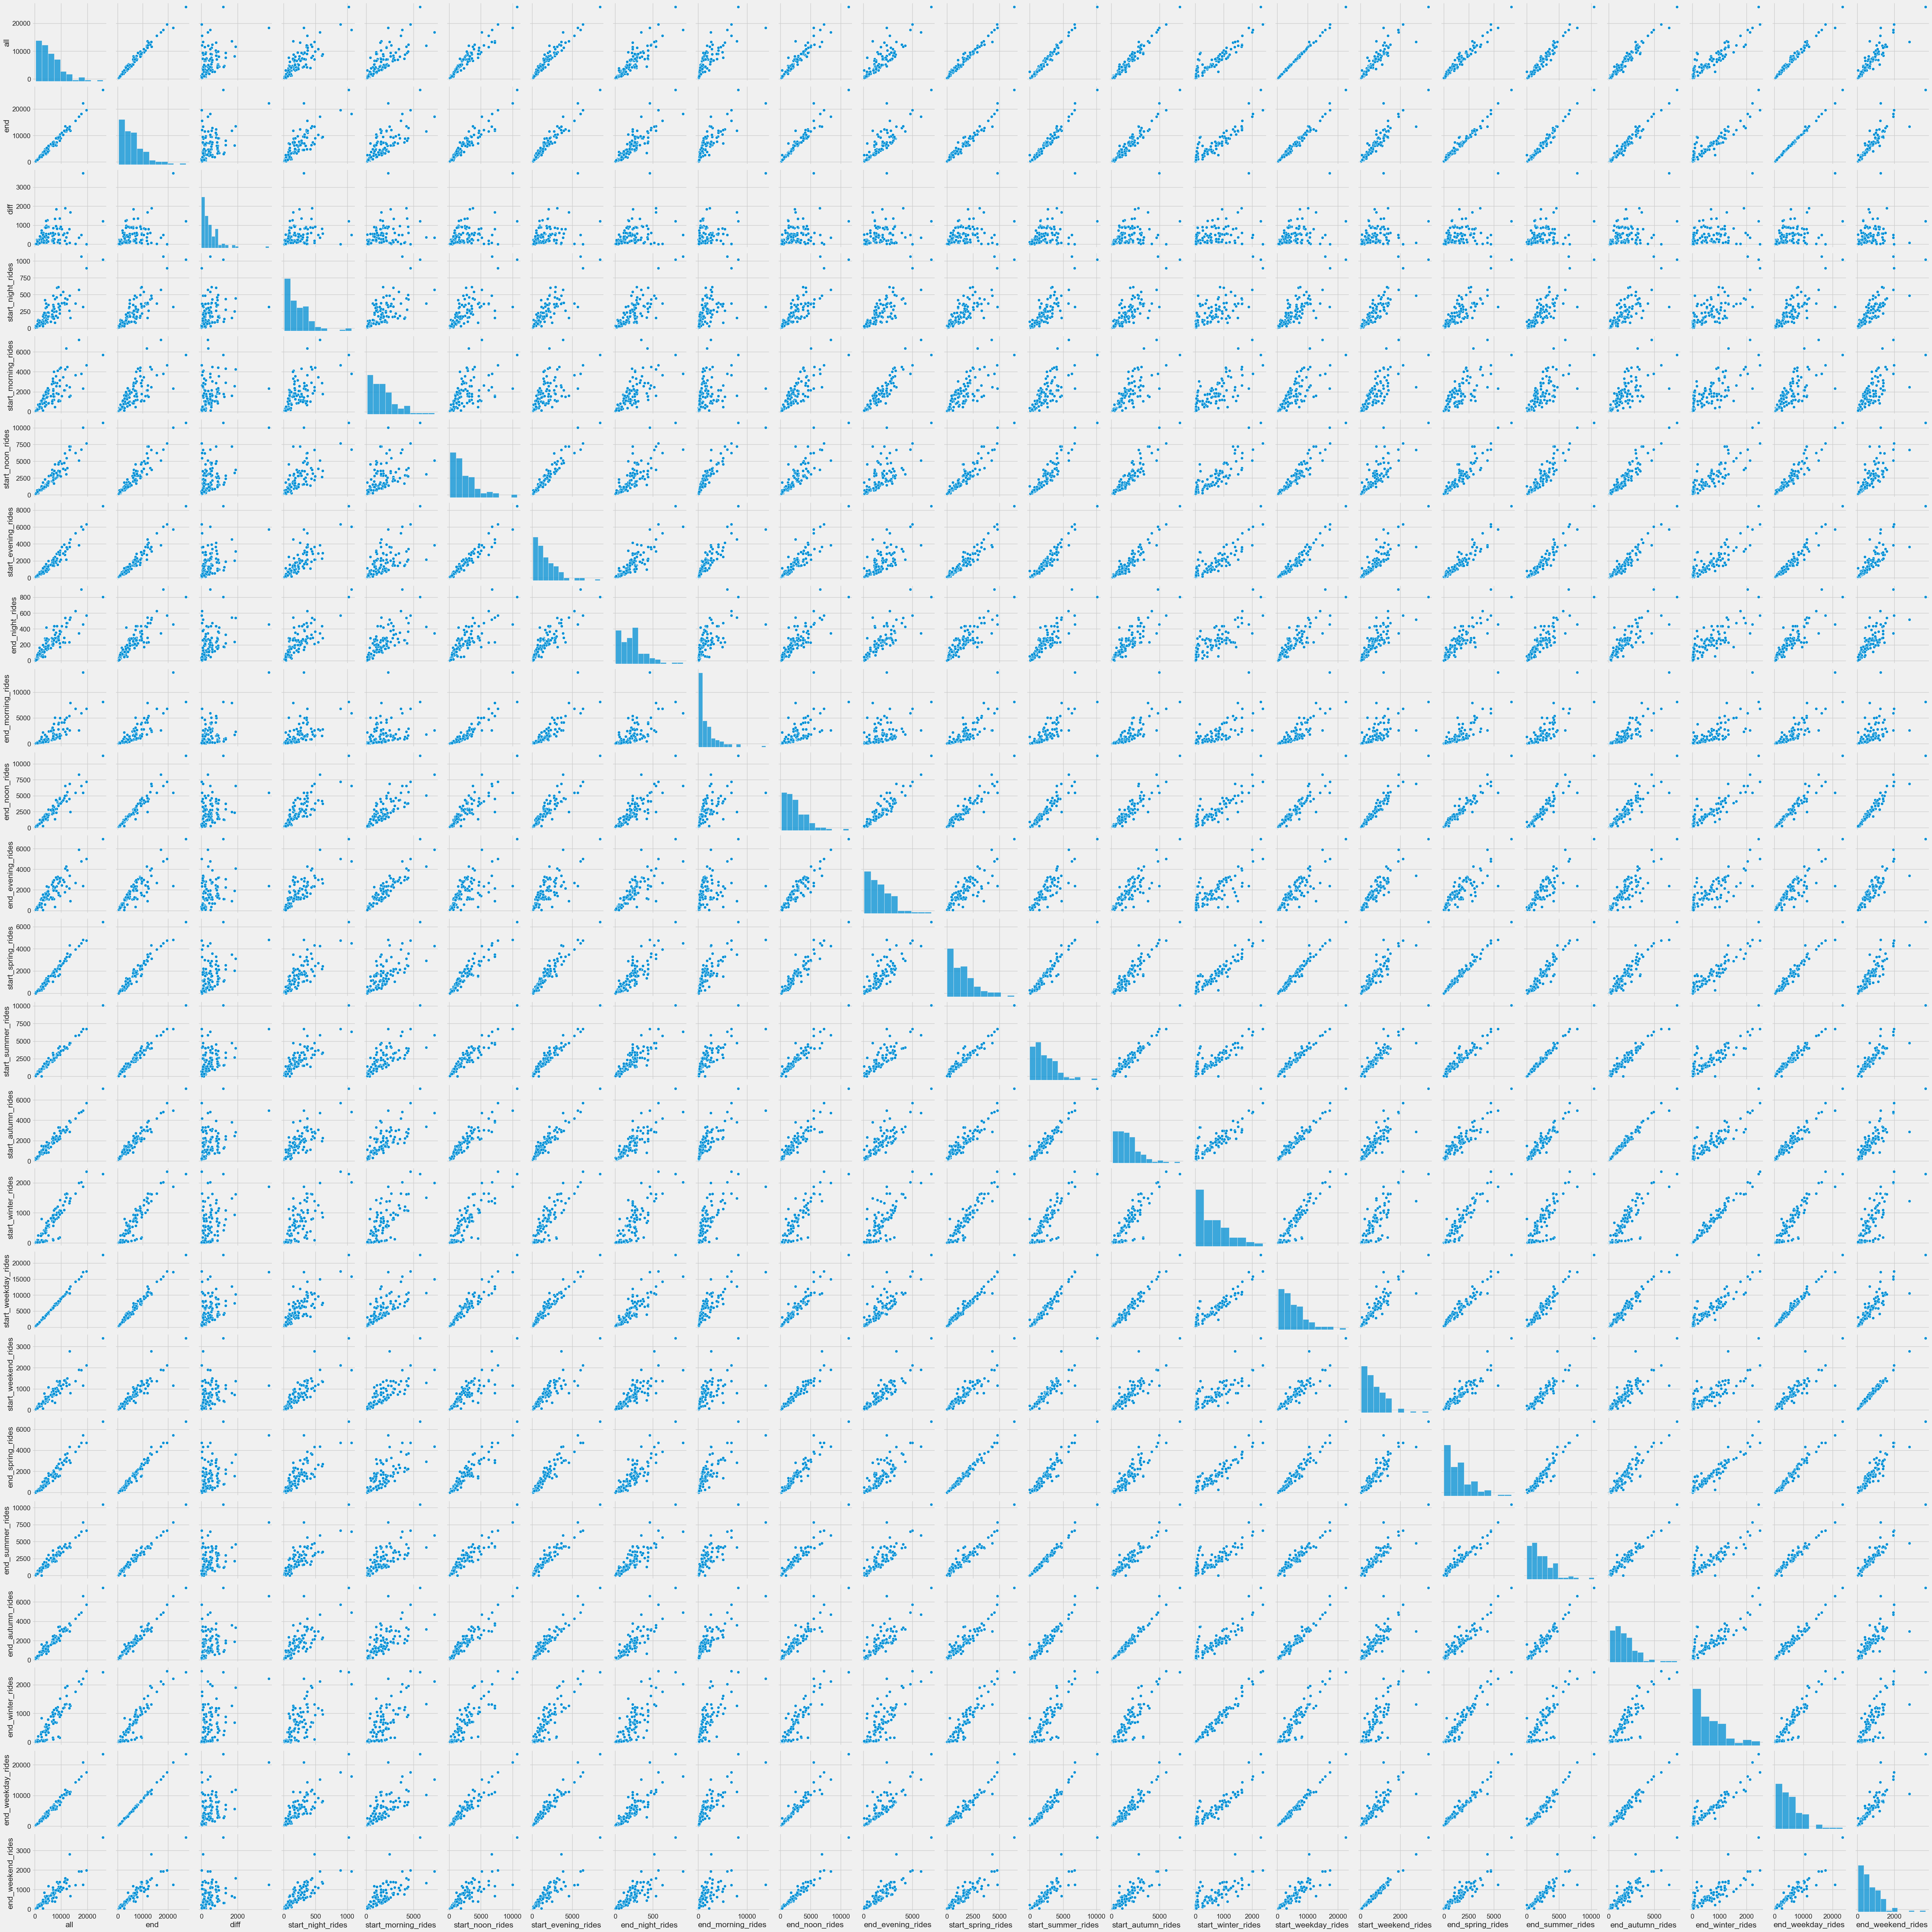

In [26]:
sns.pairplot(data=df_stations)

Mostly all the features are linear, but at start and end winter one can see, that there seem to be some outliers, were there are generally rides, but not in winter. These could all be in one cluster

# Scaling of the DF

In [27]:
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df_stations.to_numpy())

df_scaled = pd.DataFrame(df_scaled, columns=df_stations.columns)

In [28]:
len(df_scaled.columns)

23

# PCA Dimensionality
We have 23 components, so we should reduce the dimensionality, we try out how to reduce it

In [29]:
for i in range(1, len(df_scaled.columns)//2 + 1):
    pca = PCA(n_components=i)
    pca.fit_transform(df_scaled)
    print(f"for {i} components the variance is {sum(pca.explained_variance_ratio_)}")

for 1 components the variance is 0.8657126006209798
for 2 components the variance is 0.9144797700917898
for 3 components the variance is 0.9408548085281855
for 4 components the variance is 0.9606972720340398
for 5 components the variance is 0.9739316879484986
for 6 components the variance is 0.9838987214498661
for 7 components the variance is 0.9907360719029411
for 8 components the variance is 0.9944208298182615
for 9 components the variance is 0.9966813567922045
for 10 components the variance is 0.9978099914704712
for 11 components the variance is 0.9986136244656448


the dimensionality can be broken down to 1 component, meaning that all these features are very overlapping, and they can be broken down to 1 feature (Probably it mostly relies on the all trip count)
So check for correlation

In [30]:
df_scaled.corr()

,all,end,diff,start_night_rides,start_morning_rides,start_noon_rides,start_evening_rides,end_night_rides,end_morning_rides,end_noon_rides,...,start_autumn_rides,start_winter_rides,start_weekday_rides,start_weekend_rides,end_spring_rides,end_summer_rides,end_autumn_rides,end_winter_rides,end_weekday_rides,end_weekend_rides
all,1.000000,0.990456,0.404613,0.824197,0.771281,0.948874,0.969153,0.872098,0.825453,0.952783,...,0.978998,0.924194,0.998544,0.916618,0.974434,0.974590,0.973173,0.919789,0.988620,0.903750
end,0.990456,1.000000,0.411239,0.820752,0.745673,0.946346,0.967324,0.866357,0.842983,0.959671,...,0.963659,0.911837,0.988457,0.912003,0.984543,0.986590,0.979706,0.925927,0.998484,0.909910
diff,0.404613,0.411239,1.000000,0.234614,0.261297,0.430545,0.387731,0.353036,0.490813,0.303498,...,0.374832,0.369096,0.419480,0.256329,0.408251,0.406827,0.407211,0.360719,0.426212,0.256669
start_night_rides,0.824197,0.820752,0.234614,1.000000,0.657069,0.718175,0.825599,0.800631,0.564889,0.839606,...,0.796732,0.736059,0.808399,0.863663,0.823305,0.819337,0.783296,0.745200,0.805937,0.849059
start_morning_rides,0.771281,0.745673,0.261297,0.657069,1.000000,0.549643,0.619029,0.702191,0.352836,0.826870,...,0.755046,0.757228,0.762487,0.763822,0.736853,0.730370,0.712723,0.739711,0.734831,0.751670
start_noon_rides,0.948874,0.946346,0.430545,0.718175,0.549643,1.000000,0.959857,0.791665,0.929587,0.855078,...,0.929230,0.868687,0.953024,0.828765,0.930749,0.927641,0.941069,0.864764,0.950598,0.818238
start_evening_rides,0.969153,0.967324,0.387731,0.825599,0.619029,0.959857,1.000000,0.856700,0.877154,0.898323,...,0.949775,0.868949,0.969142,0.877972,0.946955,0.958372,0.956507,0.875875,0.967769,0.865770
end_night_rides,0.872098,0.866357,0.353036,0.800631,0.702191,0.791665,0.856700,1.000000,0.668286,0.834986,...,0.847922,0.814091,0.867605,0.823270,0.857814,0.854462,0.842261,0.807381,0.861712,0.813415
end_morning_rides,0.825453,0.842983,0.490813,0.564889,0.352836,0.929587,0.877154,0.668286,1.000000,0.670365,...,0.810571,0.765633,0.843531,0.613735,0.816362,0.818497,0.856051,0.780966,0.863081,0.605965
end_noon_rides,0.952783,0.959671,0.303498,0.839606,0.826870,0.855078,0.898323,0.834986,0.670365,1.000000,...,0.918421,0.874602,0.939216,0.963607,0.956488,0.952679,0.921028,0.889145,0.945814,0.966666


In [31]:
pca = PCA(n_components=1)
df_scaled = pca.fit_transform(df_scaled)

In the correlation table you can see that the correlation is extremely high, so there are no major outliers. This will mean, that we can probably break down the clusters to just the number of trips at a given station, but let's find out

# K Means(++) Clustering

In [32]:
kmeans_kwargs = {
    "n_init": "auto",
    "random_state": 11,
}
#ref: https://realpython.com/k-means-clustering-python/

sse = []
for k in range(1,11): #Maximum Number of Clusters
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

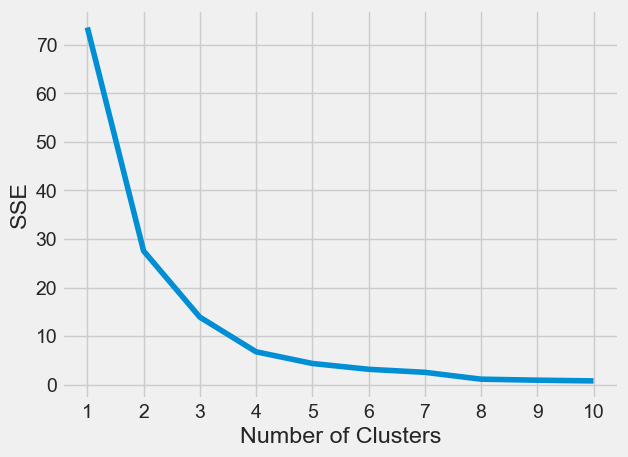

In [33]:
# plot losses
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

There is a visible edge at k=4, so take it

In [34]:
f_means = KMeans(n_clusters=4, random_state=111, n_init='auto')
f_means.fit(df_scaled)
f_means.predict(df_scaled)

df_stations['cluster'] = f_means.labels_

In [35]:
cluster_size = df_stations.groupby('cluster').size()

cluster_size

cluster
0    40
1    21
2    38
3     6
dtype: int64

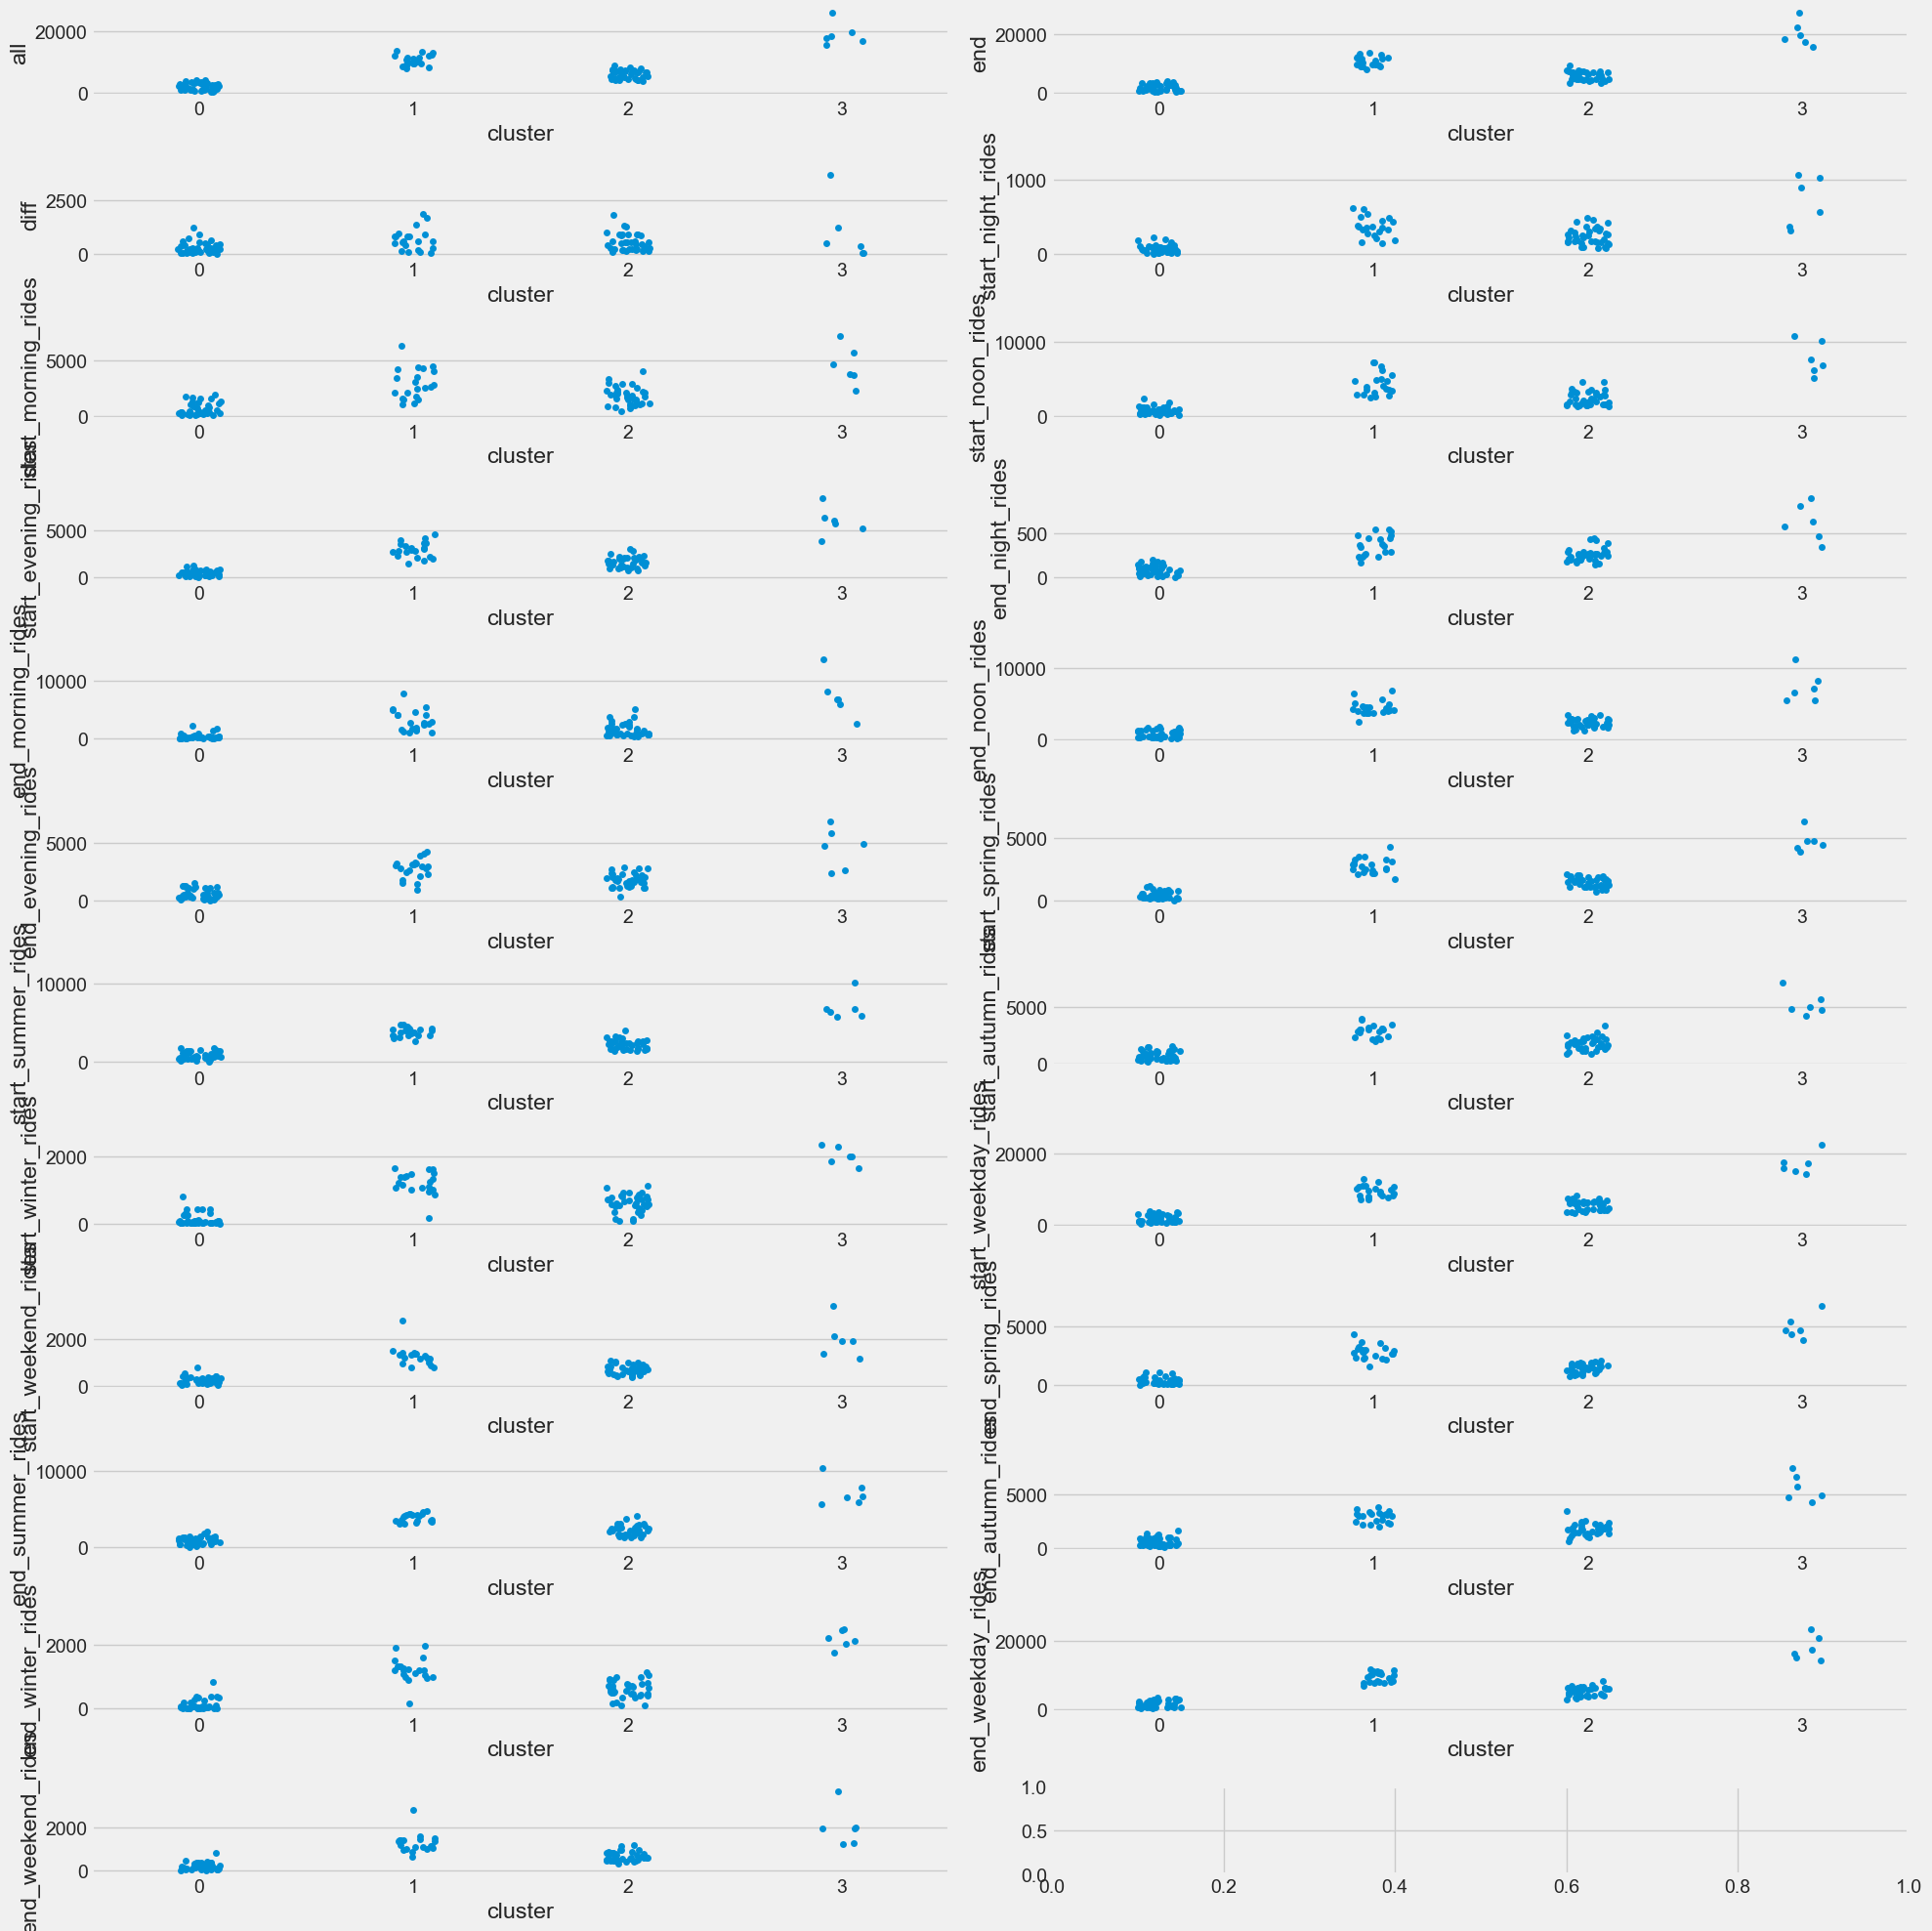

In [36]:
#ref: https://chartio.com/learn/charts/violin-plot-complete-guide/

fig, axs = plt.subplots((len(df_stations.columns)) // 2, 2)
fig.set_size_inches(20, 20)
for i, col in enumerate(df_stations.columns):
    if col != "cluster":
        sns.stripplot(
            x=df_stations["cluster"],
            y=df_stations[col],
            ax=axs[i//2][i%2],
            data=df_stations,
        )
plt.tight_layout()

Generally, the graphs show, that the clustering is basically only based on the height of the trips as they are so closely correlated to each other no matter the category
In summary this means, that this approach is not very effective and you could only rank the clusters by trip amount.